In [1]:
import numpy as np

a = 1
b = 1
c = 4
d = -2

matrix =    [ [a, b],
            [c, d]]

def eigen(A, print_values=False):
    """This function calculates the eigenvalues and eigenvectors of a square matrix and prints them."""

    eigval, v = np.linalg.eig(A)

    M = eigval.size

    nice_v = np.zeros_like(v)
    print(nice_v.shape)

    for i in range(M):
        nice_v[i] = (v[:,i])/(np.min(v[:,i]))

    if print_values==True:
        for i in range(M):
            print("\nEigenvalue {0} = {1}, eigenvector {0} = {2}, eigenvector {0} in nicer format = {3}"
                .format(i+1, eigval[i], v[:,i], nice_v[i]))
        
    return eigval, v, nice_v

eigen(matrix)[2][0]

(2, 2)


array([1., 1.])

(2, 2)
(2, 2)


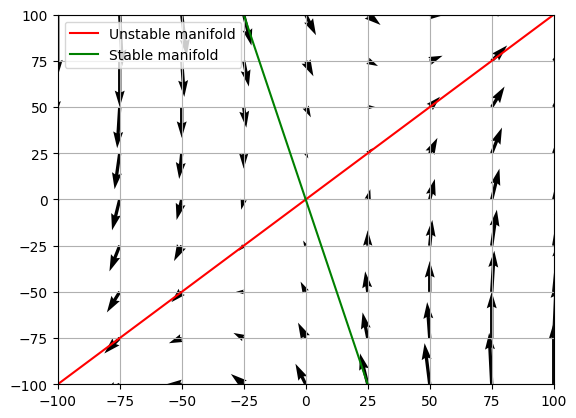

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def direction_field(a,b,c,d, xmin=-5, xmax=5, ymin=-5, ymax=5, num_arrows=9, arrow_size=1):
    
    x = np.linspace(xmin, xmax, num_arrows)
    y = np.linspace(ymin, ymax, num_arrows)

    xx,yy = np.meshgrid(x,y)

    x_dot = a*xx + b*yy
    y_dot = c*xx + d*yy

    A = [   [a,b],
            [c,d]]
    
    eigenvectors = eigen(A)[2]
    eigenvalues = eigen(A)[0]


    fig, ax = plt.subplots()

    ax.quiver(xx, yy, x_dot, y_dot)
    #ax.plot(x, np.zeros_like(x), 'gray')
    #ax.plot(np.zeros_like(y), y, 'gray')
    for i in range(2):
        if eigenvalues[i] > 0:
            ax.plot( eigenvectors[i,0]*x, eigenvectors[i,1]*y, 'r', label='Unstable manifold')
        elif eigenvalues[i] < 0:
            ax.plot( eigenvectors[i,0]*x, eigenvectors[i,1]*y, 'g', label='Stable manifold')
    
    ax.grid()
    ax.legend()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    plt.show()

direction_field(1,1,4,-2, xmin=-100, xmax=100, ymin=-100, ymax=100)